In [1]:
#pip install requests

In [2]:
#pip install beautifulsoup4

### Following data variables extracted of refrigerator analysis using web scraping on flipkart web site
1. prices
2. brands
3. capacity
4. defrost type
5. door_type
6. star_rating
7. compressor_type
8. customer_rating
9. exchange_price
10. no_of_reviews
11. no_of_ratings
12. Convertible



## Importing libraries

In [5]:
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd

## Extracting data from flipkart web site

In [138]:
price = []
brand = []
capacity = []
defrost_type = []
door_type = []
star_rating = []
compressor_type = []
customer_rating = []
exchange_price = []
no_of_reviews = []
no_of_ratings = []
convertible = []
page_num = input("Enter no of pages required: ")

for i in range (1,int(page_num)+1):
    urls = "https://www.flipkart.com/search?q=refrigrators&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page="+str(i)
    req = requests.get(urls)
    soup = BeautifulSoup(req.content, "html.parser")
    prices = soup.find_all("div", {"class":"_30jeq3 _1_WHN1"})
    features_1 = soup.find_all("div", {"class":"_4rR01T"})
    features_2 = soup.find_all("li", class_="rgWa7D")
    features_3 = soup.find_all("div", class_="_2Tpdn3 _18hQoS")
    features_4 = soup.find_all("div", class_="col col-7-12")
    
    #print("refrigerator in page"+ str(i))
    #print(len(prices))

    for i in prices:
        price_val = re.sub(r'₹', '', i.text)
        price.append(price_val)
        
    for i in features_1:
        brand.append(i.text.split()[0])
        
    for i in features_1:
            string = i.text
            pattern = r'(\d{2,3})\s?[lL]'
            match = re.search(pattern, string)

            if match:
                capacity.append(match.group(1))
            else:
                capacity.append(np.nan)
    
    for i in features_1:
        if re.search(r'[L] ', i.text):
            defrost = re.split(r'[L] ', i.text)[1].split()[0:2]
            d_t = ' '.join(defrost)
            defrost_type.append(d_t)
        else:
            defrost_type.append("N/A")
        

            
    for i in features_1:
        door_match = re.search(r'(\w+)\sDoor', i.text)
        side_by_side_match = re.search(r'Side by Side', i.text)
        if door_match:
            d_t = door_match.group(1)
        else:
            d_t = "N/A"
        if side_by_side_match:
            d_t = 'Side by Side'
        door_type.append(d_t)
        
        
    feature_list = []
    for i in features_1:
        feature_list.append(i.text.split())
    list_of_strings = [' '.join(inner_list) for inner_list in feature_list]
    input_list = list_of_strings
    pattern = r'(\d+\s)Star|Inverter\sTechnology'
    
    for input_string in input_list:
        match = re.search(pattern, input_string)
        if match:
            if match.group(1):
                value = match.group(1).strip()
                star_rating.append(value)
            else:
                star_rating.append('5')
        else:
            star_rating.append(np.nan)

                
    
    for data in soup.findAll('div', class_='_3pLy-c row'):
        specification = data.find('div', attrs={'class': 'fMghEO'})

       
        if specification:
            for each in specification:
                col = each.find_all('li', attrs={'class': 'rgWa7D'})
                if col:
                    compressor = col[0].text
                    compressor_type.append(compressor)
                else:
                    compressor_type.append(np.nan)
        else:
            compressor_type.append(np.nan)
            
            

    products = soup.find_all("div", class_="_3pLy-c row")
    for product in products:
        customer_rating_elem = product.find("div", class_="_3LWZlK")
        if customer_rating_elem:
            customer_rating.append(customer_rating_elem.text)
        else:
            customer_rating.append(np.nan)
            
            
            
    products_1 = soup.find_all("div", class_="col col-5-12 nlI3QM")
    for product in products_1:
        exchange_price_elem = product.find("div", class_="_3xFhiH")
        text = product.text
        matches = re.findall(r'Upto ₹(\d+(?:,\d+)*) Off on Exchange', text)
        if matches:
            exchange_price.extend(matches)
        else:
            exchange_price.append(np.nan)
            



    for i in features_4:
        no_rating_elem = i.find("span", class_="_2_R_DZ")
        review_str = i.text


        ratings = re.findall(r'(\d+(?:,\d+)*) Ratings', review_str)
        reviews = re.findall(r's\s&\s(.*)\sReviews', review_str)

        if ratings:
            no_of_ratings.append(ratings[0])
        else:
            no_of_ratings.append(np.nan)

        if reviews:
            no_of_reviews.append(reviews[0])
        else:
            no_of_reviews.append(np.nan)
            
    for i in features_1:
        conversion = i.text
        pattern = r'\bConvertible\b'
        match = re.search(pattern, conversion)
        result = match.group(0) if match else ""
        convertible.append(result)

    


Enter no of pages required:  50


## Checking if the extracted data of all variable is of same length or not

In [139]:
print(len(price))
print(len(brand ))
print(len(capacity))
print(len(defrost_type))
print(len(door_type))
print(len(star_rating))
print(len(compressor_type))
print(len(customer_rating))
print(len(exchange_price))
print(len(no_of_ratings))
print(len(no_of_reviews))
print(len(convertible))

984
984
984
984
984
984
984
984
984
984
984
984


## Creation of Data frame

In [140]:
DF = pd.DataFrame({"Price":price, "Brand":brand, "Capacity":capacity, "Defrost_type":defrost_type, "No_of_doors":door_type,"eff_rating":star_rating, "Compressor_type": compressor_type, "Customer_rating": customer_rating, "Exch_price":exchange_price, "No_of_rat":no_of_ratings, "No_of_reviews":no_of_reviews, "Convertible": convertible })

In [141]:
DF

,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,"15,990",Haier,190,Direct Cool,Single,4,Normal Compressor,4.4,"12,000","45,783",589,
1,"15,790",Haier,190,Direct Cool,Single,5,Normal Compressor,4.4,"12,000","421,307","2,304",
2,"24,990",LG,242,Frost Free,Double,3,Smart Inverter Compressor,4.4,"12,000","412,975","1,184",
3,"22,890",SAMSUNG,236,Frost Free,Double,2,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",
4,"25,990",SAMSUNG,236,Frost Free,Double,3,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",
...,...,...,...,...,...,...,...,...,...,...,...,...
979,"16,990",Voltas,185,Direct Cool,Single,3,Reciprocating Compressor,NaN,NaN,NaN,NaN,
980,"25,990",SAMSUNG,236,Frost Free,Double,3,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",
981,"15,570",Whirlpool,184,Direct Cool,Single,4,DC Inverter Compressor,4.3,"12,000","32,760",233,
982,"15,970",LG,190,Direct Cool,Single,2,Reciprocating Compressor,4.5,NaN,544,3,


## Saving the data frame to a .csv file(in order to avoid data getting refreshed)

In [142]:
DF.to_csv("DF4.csv")

## Reading the data from the .csv file saved

In [143]:
Data_Refrigrators = pd.read_csv(r"C:\Users\143sa\Downloads\DF4.csv")

In [144]:
Data_Refrigrators

,Unnamed: 0,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,0,"15,990",Haier,190,Direct Cool,Single,4.0,Normal Compressor,4.4,"12,000","45,783",589,NaN
1,1,"15,790",Haier,190,Direct Cool,Single,5.0,Normal Compressor,4.4,"12,000","421,307","2,304",NaN
2,2,"24,990",LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,"12,000","412,975","1,184",NaN
3,3,"22,890",SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
4,4,"25,990",SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,"16,990",Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,NaN,NaN,NaN,NaN,NaN
980,980,"25,990",SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
981,981,"15,570",Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,"12,000","32,760",233,NaN
982,982,"15,970",LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,NaN,544,3,NaN


## Creating a copy of the read data for processing

In [145]:
Data_Refrigrators_copy = Data_Refrigrators.copy()

## Dropping unwanted column

In [146]:
Data_Refrigrators_copy.drop("Unnamed: 0", axis = 1, inplace = True)

In [147]:
Data_Refrigrators_copy

,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,"15,990",Haier,190,Direct Cool,Single,4.0,Normal Compressor,4.4,"12,000","45,783",589,NaN
1,"15,790",Haier,190,Direct Cool,Single,5.0,Normal Compressor,4.4,"12,000","421,307","2,304",NaN
2,"24,990",LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,"12,000","412,975","1,184",NaN
3,"22,890",SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
4,"25,990",SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
979,"16,990",Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,NaN,NaN,NaN,NaN,NaN
980,"25,990",SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,"12,000","425,283","2,242",NaN
981,"15,570",Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,"12,000","32,760",233,NaN
982,"15,970",LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,NaN,544,3,NaN


## Data Cleaning

- special charcters removal.
- replacing null values accordingly.
- ensuring no missing values.
- Type casting of the 'data type from object' to respective.

In [148]:
Data_Refrigrators_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            984 non-null    object 
 1   Brand            984 non-null    object 
 2   Capacity         984 non-null    int64  
 3   Defrost_type     982 non-null    object 
 4   No_of_doors      983 non-null    object 
 5   eff_rating       850 non-null    float64
 6   Compressor_type  984 non-null    object 
 7   Customer_rating  819 non-null    float64
 8   Exch_price       734 non-null    object 
 9   No_of_rat        819 non-null    object 
 10  No_of_reviews    819 non-null    object 
 11  Convertible      206 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 92.4+ KB


## Special charcters removal.

In [149]:

Data_Refrigrators_copy["Price"] = Data_Refrigrators_copy["Price"].str.replace(',', '')

Data_Refrigrators_copy["Exch_price"] = Data_Refrigrators_copy["Exch_price"].str.replace(',', '')

Data_Refrigrators_copy["No_of_reviews"] = Data_Refrigrators_copy["No_of_reviews"].str.replace(',', '')

Data_Refrigrators_copy["No_of_rat"] = Data_Refrigrators_copy["No_of_rat"].str.replace(',', '')

## Replacing null values accordingly.

In [150]:
Data_Refrigrators_copy["Capacity"].fillna("0", inplace=True)
Data_Refrigrators_copy["No_of_doors"].fillna("Single", inplace=True)
Data_Refrigrators_copy["Customer_rating"].fillna(0.0, inplace=True)
Data_Refrigrators_copy["Exch_price"].fillna("0", inplace=True)
Data_Refrigrators_copy["No_of_rat"].fillna("0", inplace=True)
Data_Refrigrators_copy["No_of_reviews"].fillna("0", inplace=True)
Data_Refrigrators_copy["Convertible"].fillna("Non-Convertible", inplace=True)

In [151]:

Data_Refrigrators_copy['No_of_rat'] = Data_Refrigrators_copy['No_of_rat'].apply(lambda x: x[1:] if len(x) >= 2 and int(x) > 0 else x)

In [152]:

Data_Refrigrators_copy['eff_rating'] = pd.to_numeric(Data_Refrigrators_copy['eff_rating'], errors='coerce')

mean_eff_rating = Data_Refrigrators_copy['eff_rating'].mean()

Data_Refrigrators_copy['eff_rating'].fillna(mean_eff_rating, inplace=True)


In [153]:

Data_Refrigrators_copy["Defrost_type"] = Data_Refrigrators_copy["Defrost_type"].astype(str)

mode_defrost_type = Data_Refrigrators_copy["Defrost_type"].mode()[0]


Data_Refrigrators_copy["Defrost_type"].fillna(mode_defrost_type, inplace=True)

In [154]:
Data_Refrigrators_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            984 non-null    object 
 1   Brand            984 non-null    object 
 2   Capacity         984 non-null    int64  
 3   Defrost_type     984 non-null    object 
 4   No_of_doors      984 non-null    object 
 5   eff_rating       984 non-null    float64
 6   Compressor_type  984 non-null    object 
 7   Customer_rating  984 non-null    float64
 8   Exch_price       984 non-null    object 
 9   No_of_rat        984 non-null    object 
 10  No_of_reviews    984 non-null    object 
 11  Convertible      984 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 92.4+ KB


In [155]:
Data_Refrigrators_copy.isnull().sum()

Price              0
Brand              0
Capacity           0
Defrost_type       0
No_of_doors        0
eff_rating         0
Compressor_type    0
Customer_rating    0
Exch_price         0
No_of_rat          0
No_of_reviews      0
Convertible        0
dtype: int64

In [156]:
Data_Refrigrators_copy["Price"] = pd.to_numeric(Data_Refrigrators_copy["Price"])

Data_Refrigrators_copy["Brand"] = Data_Refrigrators_copy["Brand"].astype(str)

Data_Refrigrators_copy["Capacity"] = pd.to_numeric(Data_Refrigrators_copy["Capacity"])

Data_Refrigrators_copy["Defrost_type"] = Data_Refrigrators_copy["Defrost_type"].astype(str)

Data_Refrigrators_copy["Compressor_type"] = Data_Refrigrators_copy["Compressor_type"].astype(str)

Data_Refrigrators_copy["Exch_price"] = pd.to_numeric(Data_Refrigrators_copy["Exch_price"], errors='coerce')

Data_Refrigrators_copy["No_of_reviews"] = pd.to_numeric(Data_Refrigrators_copy["No_of_reviews"], errors='coerce')

Data_Refrigrators_copy["No_of_rat"] = pd.to_numeric(Data_Refrigrators_copy["No_of_rat"], errors='coerce')

In [157]:
Data_Refrigrators_copy

,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,15990,Haier,190,Direct Cool,Single,4.0,Normal Compressor,4.4,12000,5783,589,Non-Convertible
1,15790,Haier,190,Direct Cool,Single,5.0,Normal Compressor,4.4,12000,21307,2304,Non-Convertible
2,24990,LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,12000,12975,1184,Non-Convertible
3,22890,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
4,25990,SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...
979,16990,Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,0.0,0,0,0,Non-Convertible
980,25990,SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
981,15570,Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,12000,2760,233,Non-Convertible
982,15970,LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,0,44,3,Non-Convertible


In [158]:
Data_Refrigrators_copy.shape

(984, 12)

In [159]:
Data_Refrigrators_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            984 non-null    int64  
 1   Brand            984 non-null    object 
 2   Capacity         984 non-null    int64  
 3   Defrost_type     984 non-null    object 
 4   No_of_doors      984 non-null    object 
 5   eff_rating       984 non-null    float64
 6   Compressor_type  984 non-null    object 
 7   Customer_rating  984 non-null    float64
 8   Exch_price       984 non-null    int64  
 9   No_of_rat        984 non-null    int64  
 10  No_of_reviews    984 non-null    int64  
 11  Convertible      984 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [160]:
dup = Data_Refrigrators_copy.duplicated()

In [161]:
print(dup.to_string())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26      True
27      True
28     False
29     False
30      True
31      True
32     False
33     False
34     False
35     False
36      True
37      True
38     False
39     False
40      True
41      True
42     False
43     False
44     False
45     False
46      True
47      True
48      True
49     False
50      True
51      True
52     False
53     False
54     False
55     False
56      True
57      True
58      True
59     False
60      True
61      True
62      True
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70      True
71     False
72      True
73     False
74     False
75     False
76      True

In [162]:
Data_Refrigrators_copy.drop_duplicates(keep='last',inplace=True)

In [163]:
Data_Refrigrators_copy

,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
2,24990,LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,12000,12975,1184,Non-Convertible
3,22890,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
9,13790,SAMSUNG,183,Direct Cool,Single,2.0,Digital Inverter Compressor,4.4,12000,7941,607,Non-Convertible
12,24490,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,21781,2061,Convertible
13,17890,SAMSUNG,189,Direct Cool,Single,5.0,Digital Inverter Compressor,4.5,12000,16135,1431,Non-Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...
979,16990,Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,0.0,0,0,0,Non-Convertible
980,25990,SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
981,15570,Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,12000,2760,233,Non-Convertible
982,15970,LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,0,44,3,Non-Convertible


In [164]:
Data_Refrigrators_copy.to_csv("DF_unique.csv")

In [6]:
DF = pd.read_csv(r"C:\Users\143sa\Downloads\DF_unique.csv")

In [7]:
DF

,Unnamed: 0,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,2,24990,LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,12000,12975,1184,Non-Convertible
1,3,22890,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
2,9,13790,SAMSUNG,183,Direct Cool,Single,2.0,Digital Inverter Compressor,4.4,12000,7941,607,Non-Convertible
3,12,24490,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,21781,2061,Convertible
4,13,17890,SAMSUNG,189,Direct Cool,Single,5.0,Digital Inverter Compressor,4.5,12000,16135,1431,Non-Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,979,16990,Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,0.0,0,0,0,Non-Convertible
508,980,25990,SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
509,981,15570,Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,12000,2760,233,Non-Convertible
510,982,15970,LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,0,44,3,Non-Convertible


In [8]:
DF.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
DF

,Price,Brand,Capacity,Defrost_type,No_of_doors,eff_rating,Compressor_type,Customer_rating,Exch_price,No_of_rat,No_of_reviews,Convertible
0,24990,LG,242,Frost Free,Double,3.0,Smart Inverter Compressor,4.4,12000,12975,1184,Non-Convertible
1,22890,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
2,13790,SAMSUNG,183,Direct Cool,Single,2.0,Digital Inverter Compressor,4.4,12000,7941,607,Non-Convertible
3,24490,SAMSUNG,236,Frost Free,Double,2.0,Digital Inverter Compressor,4.4,12000,21781,2061,Convertible
4,17890,SAMSUNG,189,Direct Cool,Single,5.0,Digital Inverter Compressor,4.5,12000,16135,1431,Non-Convertible
...,...,...,...,...,...,...,...,...,...,...,...,...
507,16990,Voltas,185,Direct Cool,Single,3.0,Reciprocating Compressor,0.0,0,0,0,Non-Convertible
508,25990,SAMSUNG,236,Frost Free,Double,3.0,Digital Inverter Compressor,4.4,12000,25283,2242,Non-Convertible
509,15570,Whirlpool,184,Direct Cool,Single,4.0,DC Inverter Compressor,4.3,12000,2760,233,Non-Convertible
510,15970,LG,190,Direct Cool,Single,2.0,Reciprocating Compressor,4.5,0,44,3,Non-Convertible


In [13]:
DF["Brand"] = DF['Brand'].str.upper()

In [14]:
DF.loc[~DF['Defrost_type'].isin(['Frost Free', 'Direct Cool']), 'Defrost_type'] = pd.NA

In [15]:
DF.shape

(512, 12)

In [16]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            512 non-null    int64  
 1   Brand            512 non-null    object 
 2   Capacity         512 non-null    int64  
 3   Defrost_type     509 non-null    object 
 4   No_of_doors      512 non-null    object 
 5   eff_rating       512 non-null    float64
 6   Compressor_type  512 non-null    object 
 7   Customer_rating  512 non-null    float64
 8   Exch_price       512 non-null    int64  
 9   No_of_rat        512 non-null    int64  
 10  No_of_reviews    512 non-null    int64  
 11  Convertible      512 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 48.1+ KB


## Most Sold Brand based on 'No_of_rat'

In [173]:
brand_sales = DF.groupby('Brand')[['No_of_rat']].sum()
most_sold_brand = brand_sales.idxmax()[0]
print("The most sold brand is:", most_sold_brand)

The most sold brand is: SAMSUNG


## Most Sold Brand based on 'No_of_rat', 'No_of_reviews'

In [174]:
brand_sales = DF.groupby('Brand')[['No_of_rat', 'No_of_reviews']].sum()
most_sold_brand = brand_sales.idxmax()[0]
print("The most sold brand is:", most_sold_brand)

The most sold brand is: SAMSUNG


## Average Price of a refrigrator

In [175]:
mean_price = DF["Price"].mean()
rounded_mean_price = round(mean_price, 2)
print("Average Price of a refrigrator:", rounded_mean_price)

Average Price of a refrigrator: 32404.16


## Highest Price of a refrigrator

In [176]:
Highest_price_row = DF.loc[DF['Price'].idxmax()]

Highest_price = Highest_price_row['Price']
Highest_brand = Highest_price_row['Brand']
Highest_capacity = Highest_price_row['Capacity']

result_string = f"Highest Price of refrigerator is {Highest_price} of {Highest_brand} brand and {Highest_capacity} L capacity."

print(result_string)

Highest Price of refrigerator is 184999 of SAMSUNG brand and 681 L capacity.


## Lowest Price of Refrigrator

In [177]:
lowest_price_row = DF.loc[DF['Price'].idxmin()]

lowest_price = lowest_price_row['Price']
lowest_brand = lowest_price_row['Brand']
lowest_capacity = lowest_price_row['Capacity']

result_string = f"Lowest Price of refrigerator is {lowest_price} of {lowest_brand} brand and {lowest_capacity} L capacity."

print(result_string)

Lowest Price of refrigerator is 9990 of CANDY brand and 165 L capacity.


## No.of Refrigrators with eff_rating above 4 and price below 30000

In [178]:
filtered_df = DF[(DF['eff_rating'] == 4.0) & (DF['Price'] < 30000)]

count = len(filtered_df)

print("Number of refrigerators with eff_rating = 4 and Price below 30000:", count)

Number of refrigerators with eff_rating = 4 and Price below 30000: 62


## No.of Refrigrators with eff_rating = 4 and price below 30000 having double or multiple door

In [179]:
filtered_df = DF[(DF['eff_rating'] == 4.0) & (DF['Price'] < 30000) & DF['No_of_doors'] != 'Single' ]

count = len(filtered_df)

print("Number of refrigerators with eff_rating = 4 and Price below 30000 and more than single door:", count)

Number of refrigerators with eff_rating = 4 and Price below 30000 and more than single door: 512


#  Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## No of refrigrators under various price ranges

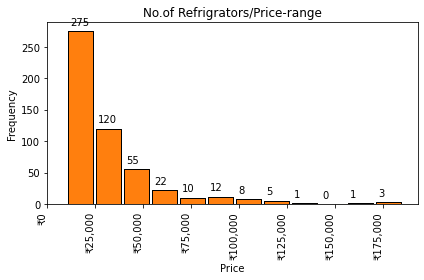

In [222]:
plt.hist(DF['Price'], bins=12, edgecolor='black', rwidth=0.9)

counts, edges, _ = plt.hist(DF['Price'], bins=12, edgecolor='black', rwidth=0.9)
for count, edge in zip(counts, edges):
    plt.text(edge + 2000, count + 10, str(int(count)), fontsize=10, color='black')
    
    
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('No.of Refrigrators/Price-range')

xtick_positions = range(0, int(edges[-1]) + 1, 25000)
xtick_labels = [f'₹{x:,}' for x in xtick_positions]

plt.xticks(xtick_positions, xtick_labels, rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Price range by Brand

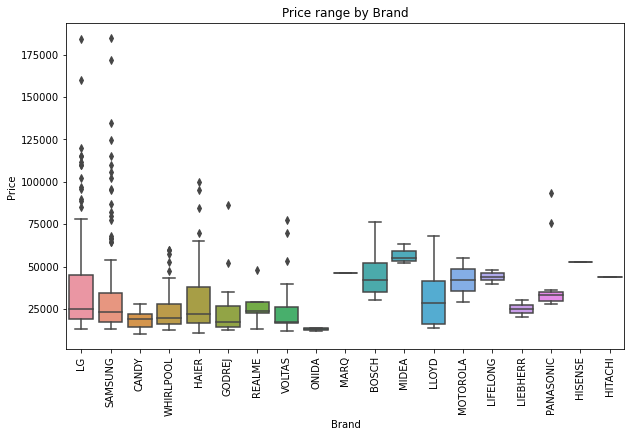

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=DF)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price range by Brand')
plt.show()

## Bar Chart of Brands and Their Average Prices:

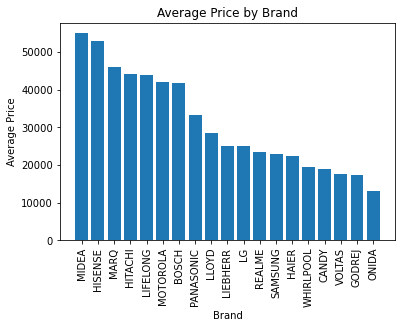

In [12]:

brand_avg_price = DF.groupby('Brand')['Price'].median()
brand_avg_price = brand_avg_price.sort_values(ascending=False)
plt.bar(brand_avg_price.index, brand_avg_price)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=90)
plt.show()


In [13]:
sorted_df = DF.sort_values(by='Price', ascending=False)

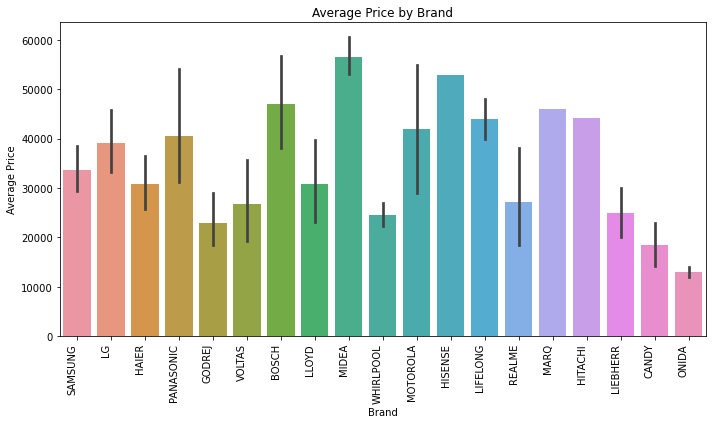

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Brand', y='Price')
plt.xticks(rotation=90, ha='right') 
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.tight_layout()
plt.show()


## Max Price in Each Brand:

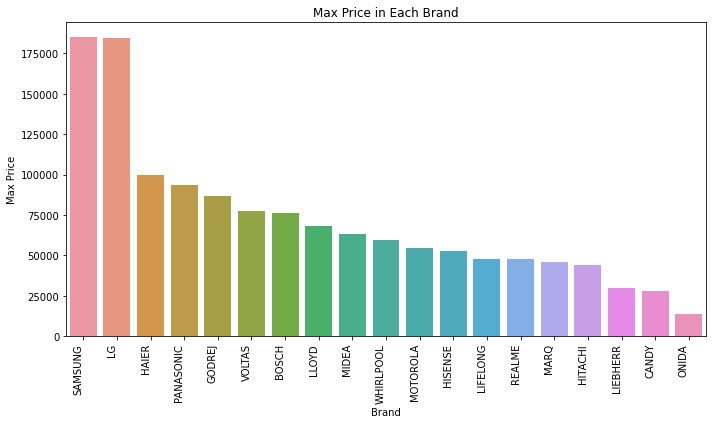

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Brand', y='Price', estimator=max, ci=None)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Brand')
plt.ylabel('Max Price')
plt.title('Max Price in Each Brand')
plt.tight_layout()
plt.show()


## Min Price in Each Brand:

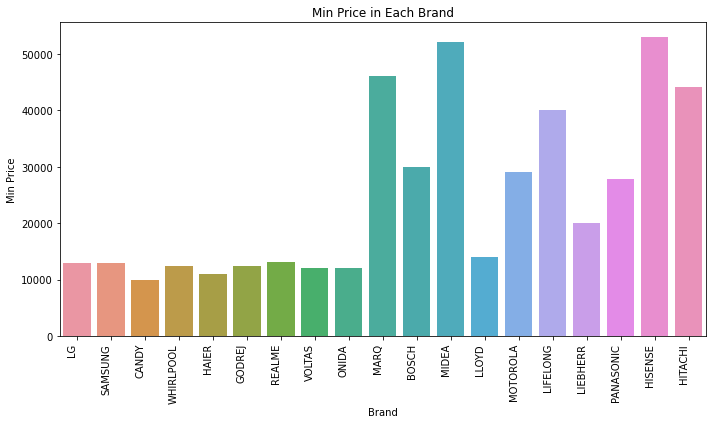

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=DF, x='Brand', y='Price', estimator=min, ci=None)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Brand')
plt.ylabel('Min Price')
plt.title('Min Price in Each Brand')
plt.tight_layout()
plt.show()


## Max Capacity in Each Brand:

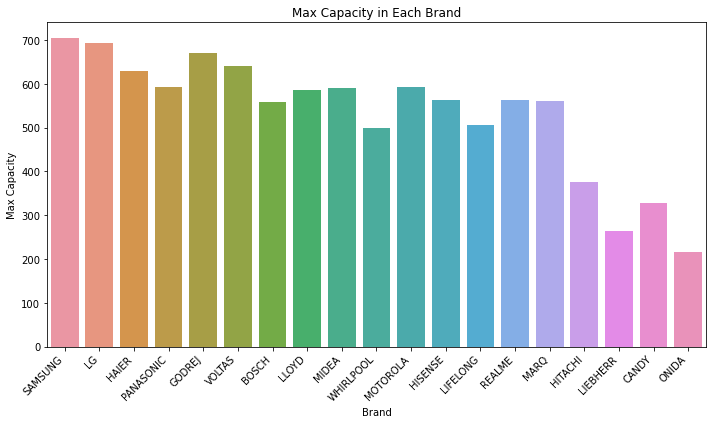

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Brand', y='Capacity', estimator=max, ci=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Max Capacity')
plt.title('Max Capacity in Each Brand')
plt.tight_layout()
plt.show()


## Max No_of_rat in Each Brand - unique:

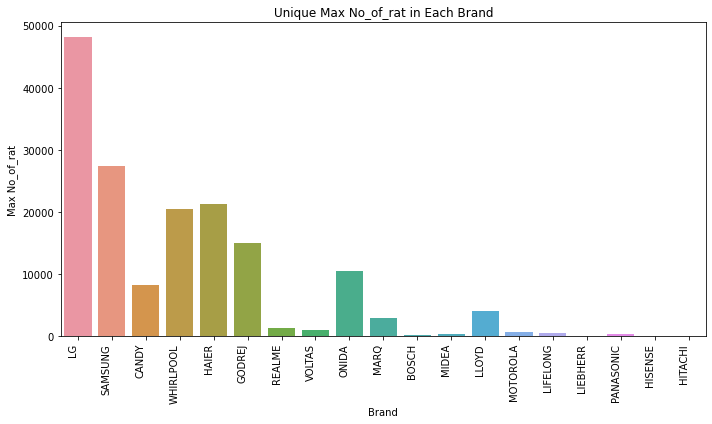

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=DF, x='Brand', y='No_of_rat', estimator=max, ci=None)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Brand')
plt.ylabel('Max No_of_rat')
plt.title('Unique Max No_of_rat in Each Brand')
plt.tight_layout()
plt.show()


## Sum of No_of_rat by Brand

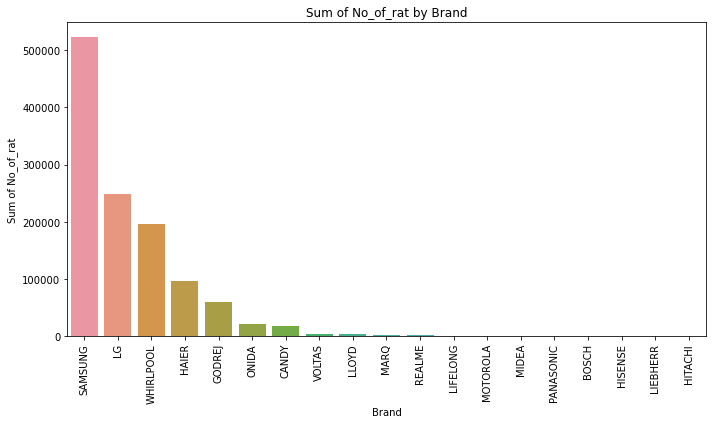

In [18]:
sum_no_of_rat_by_brand = DF.groupby('Brand')['No_of_rat'].sum()
sorted_sum_no_of_rat = sum_no_of_rat_by_brand.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_sum_no_of_rat.index, y=sorted_sum_no_of_rat.values)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Sum of No_of_rat')
plt.title('Sum of No_of_rat by Brand')
plt.tight_layout()
plt.show()


## Distribution of Defrost Types

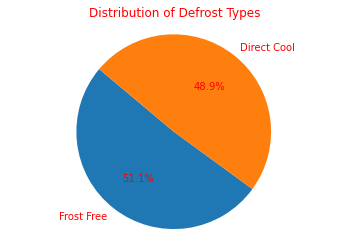

In [202]:
defrost_counts = DF['Defrost_type'].value_counts()


plt.pie(defrost_counts, labels=defrost_counts.index, autopct='%1.1f%%', startangle=140,
        textprops={'color': 'red'}) 

plt.axis('equal') 
plt.title('Distribution of Defrost Types',  color='red')
plt.show()

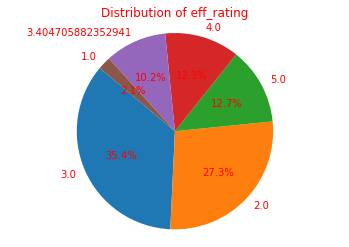

In [24]:
defrost_counts = DF['eff_rating'].value_counts()


plt.pie(defrost_counts, labels=defrost_counts.index, autopct='%1.1f%%', startangle=140,
        textprops={'color': 'red'}) 

plt.axis('equal') 
plt.title('Distribution of eff_rating',  color='red')
plt.show()

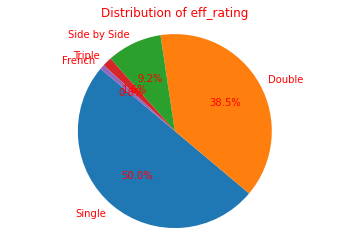

In [26]:
defrost_counts = DF['No_of_doors'].value_counts()


plt.pie(defrost_counts, labels=defrost_counts.index, autopct='%1.1f%%', startangle=140,
        textprops={'color': 'red'}) 

plt.axis('equal') 
plt.title('Distribution of eff_rating',  color='red')
plt.show()

## Count of door types

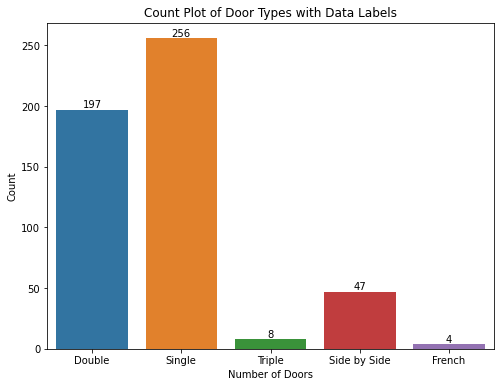

In [201]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=DF, x='No_of_doors')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.title('Count Plot of Door Types with Data Labels')
plt.show()


## Capacity vs Price

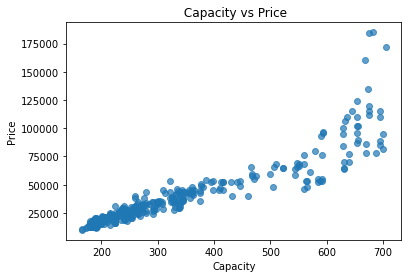

In [27]:
plt.scatter(DF['Capacity'], DF['Price'], alpha=0.7)
plt.xlabel('Capacity')
plt.ylabel('Price')
plt.title(' Capacity vs Price')
plt.show()


## Customer Ratings by Brand

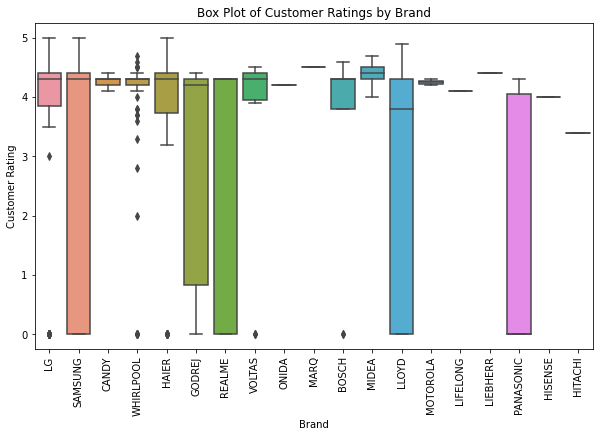

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Customer_rating', data=DF)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Customer Rating')
plt.title('Box Plot of Customer Ratings by Brand')
plt.show()

## Pairplot for numeric columns

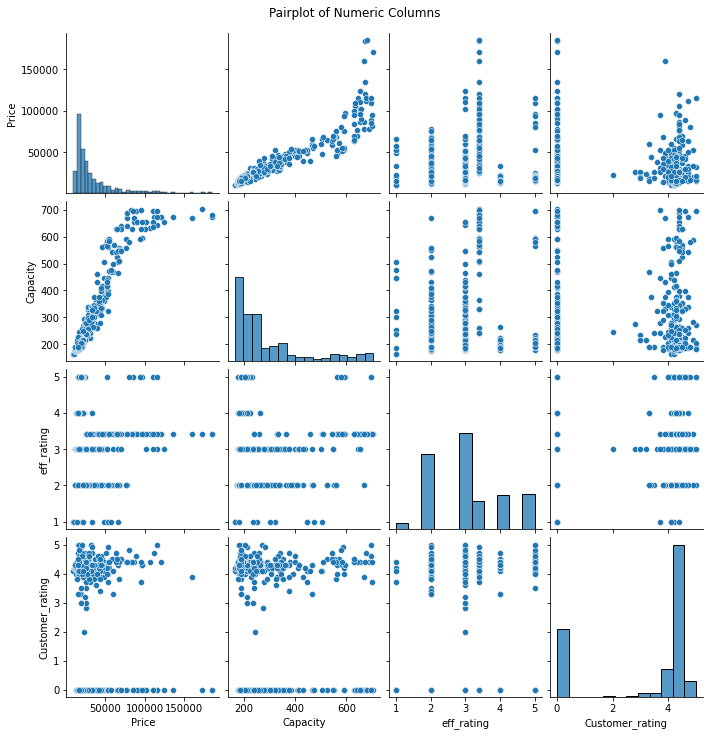

In [204]:
sns.pairplot(DF[['Price', 'Capacity', 'eff_rating', 'Customer_rating']])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

## Correlation Heat map

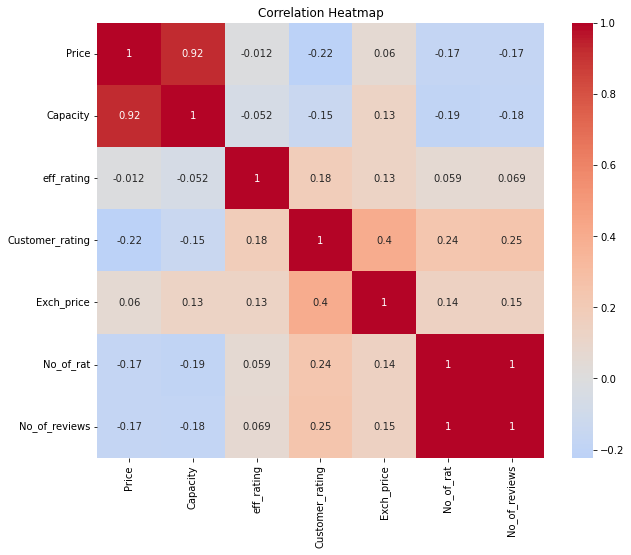

In [223]:
correlation_matrix = DF.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


## No of Exchange Price's per Brand

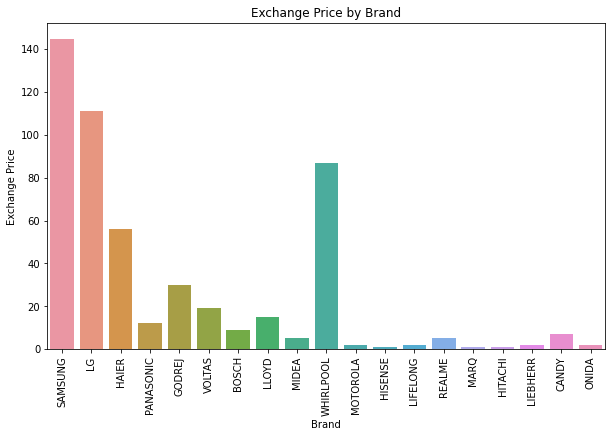

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sorted_df, x='Brand')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Exchange Price')
plt.title('Exchange Price by Brand')
plt.show()


## Customer Ratings by Brand and Door Type

In [28]:
sorted_df_rat = DF.sort_values(by='Customer_rating', ascending=False)

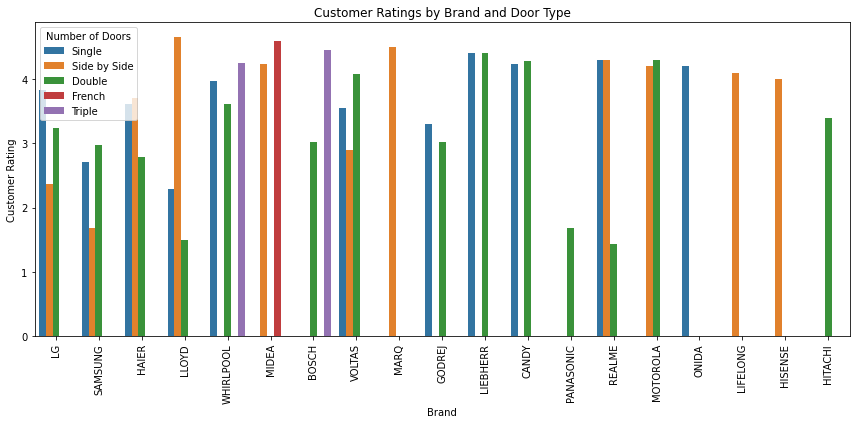

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df_rat, x='Brand', y='Customer_rating', hue='No_of_doors', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Customer Rating')
plt.title('Customer Ratings by Brand and Door Type')
plt.legend(title='Number of Doors')
plt.tight_layout()
plt.show()

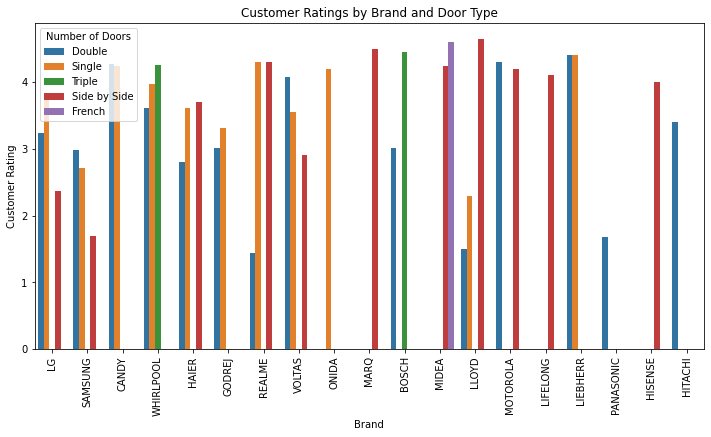

In [247]:
plt.figure(figsize=(12, 6))
sns.barplot(data=DF, x='Brand', y='Customer_rating', hue='No_of_doors', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Customer Rating')
plt.title('Customer Ratings by Brand and Door Type')
plt.legend(title='Number of Doors')
plt.show()


## Refrigrators with features {Defrost_type : Frost Free, eff_rat: >= 3, Convertible: convertible} sorted in ascending order of price

In [22]:
filtered_df = DF[(DF['Defrost_type'] == 'Frost Free') &
                 (DF['eff_rating'] >= 3) &
                 (DF['Convertible'] == 'Convertible')]


sorted_filtered_df = filtered_df.sort_values(by='Price')

print(sorted_filtered_df)




     Price      Brand  Capacity Defrost_type   No_of_doors  eff_rating  \
34   22990     GODREJ       223   Frost Free        Double    3.000000   
411  25590  WHIRLPOOL       265   Frost Free        Double    3.000000   
153  26490    SAMSUNG       253   Frost Free        Double    3.000000   
287  27490    SAMSUNG       244   Frost Free        Double    3.000000   
49   27740  WHIRLPOOL       265   Frost Free        Double    3.000000   
64   27790    SAMSUNG       236   Frost Free        Double    3.000000   
54   27990         LG       246   Frost Free        Double    3.000000   
255  27990         LG       246   Frost Free        Double    3.000000   
128  28990   MOTOROLA       338   Frost Free        Double    3.000000   
70   29290     GODREJ       294   Frost Free        Double    3.000000   
17   29490    SAMSUNG       256   Frost Free        Double    3.000000   
155  29490     GODREJ       272   Frost Free        Double    3.000000   
276  29990      BOSCH       263   Fros

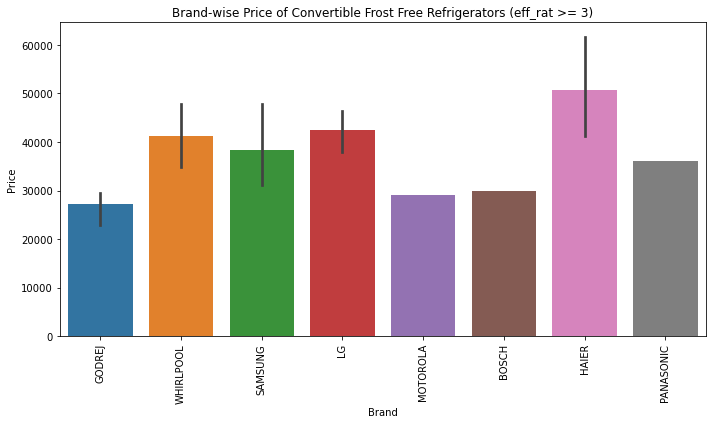

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_filtered_df, x='Brand', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand-wise Price of Convertible Frost Free Refrigerators (eff_rat >= 3)')
plt.tight_layout()
plt.show()

## Price by Brand and Defrost Type

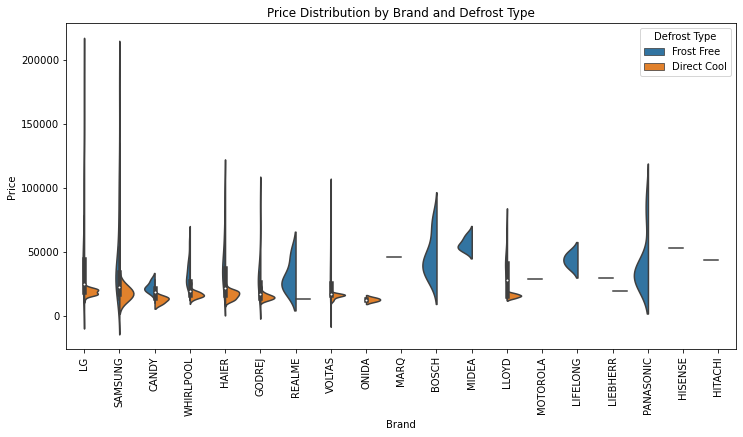

In [249]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=DF, x='Brand', y='Price', hue='Defrost_type', split=True)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand and Defrost Type')
plt.legend(title='Defrost Type')
plt.show()


## Customer Ratings over Prices

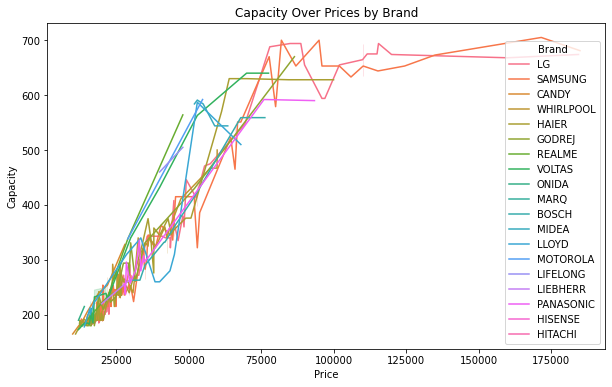

In [248]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=DF, x='Price', y='Capacity', hue='Brand')
plt.xlabel('Price')
plt.ylabel('Capacity')
plt.title('Capacity Over Prices by Brand')
plt.legend(title='Brand')
plt.show()


## Customer Rating and Efficiency Rating

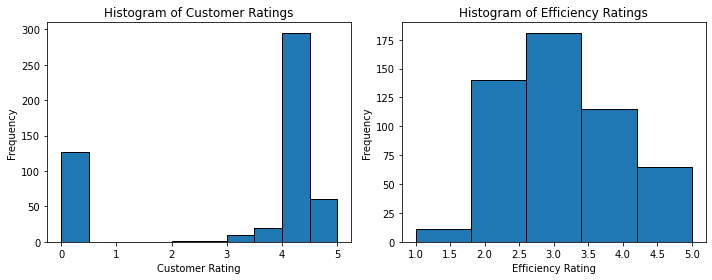

In [250]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(DF['Customer_rating'], bins=10, edgecolor='black')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Ratings')

plt.subplot(1, 2, 2)
plt.hist(DF['eff_rating'], bins=5, edgecolor='black')
plt.xlabel('Efficiency Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Efficiency Ratings')

plt.tight_layout()
plt.show()


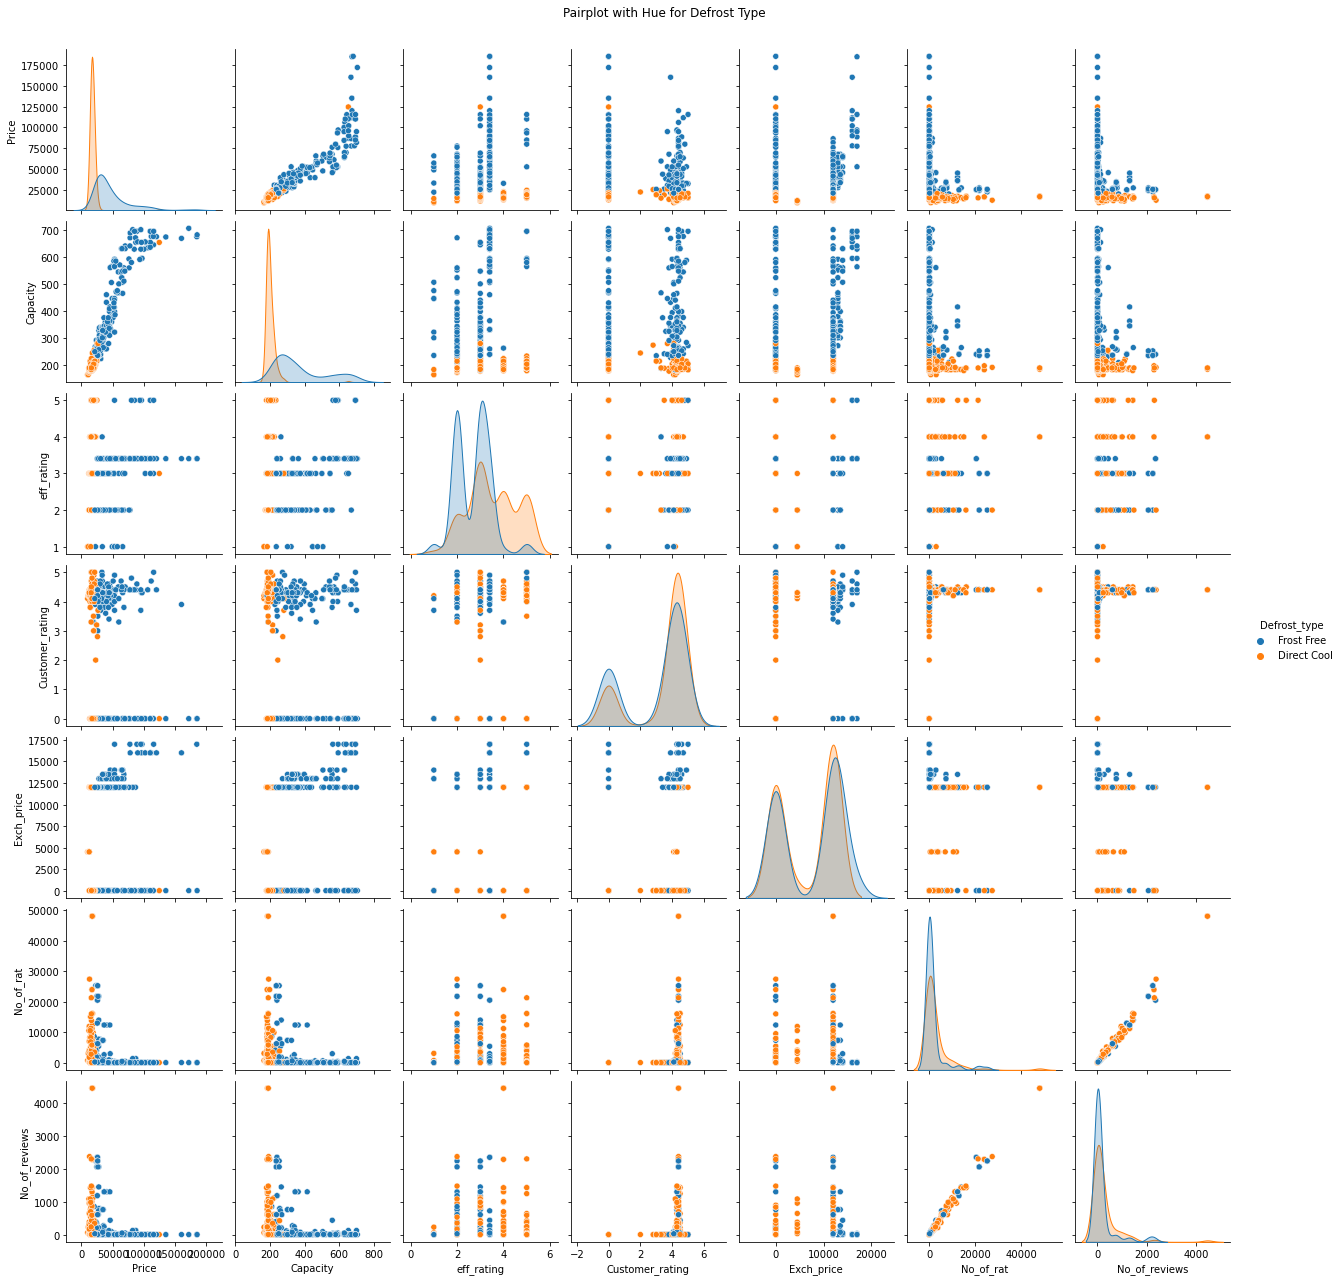

In [253]:
sns.pairplot(DF, hue='Defrost_type')
plt.suptitle('Pairplot with Hue for Defrost Type', y=1.02)
plt.show()


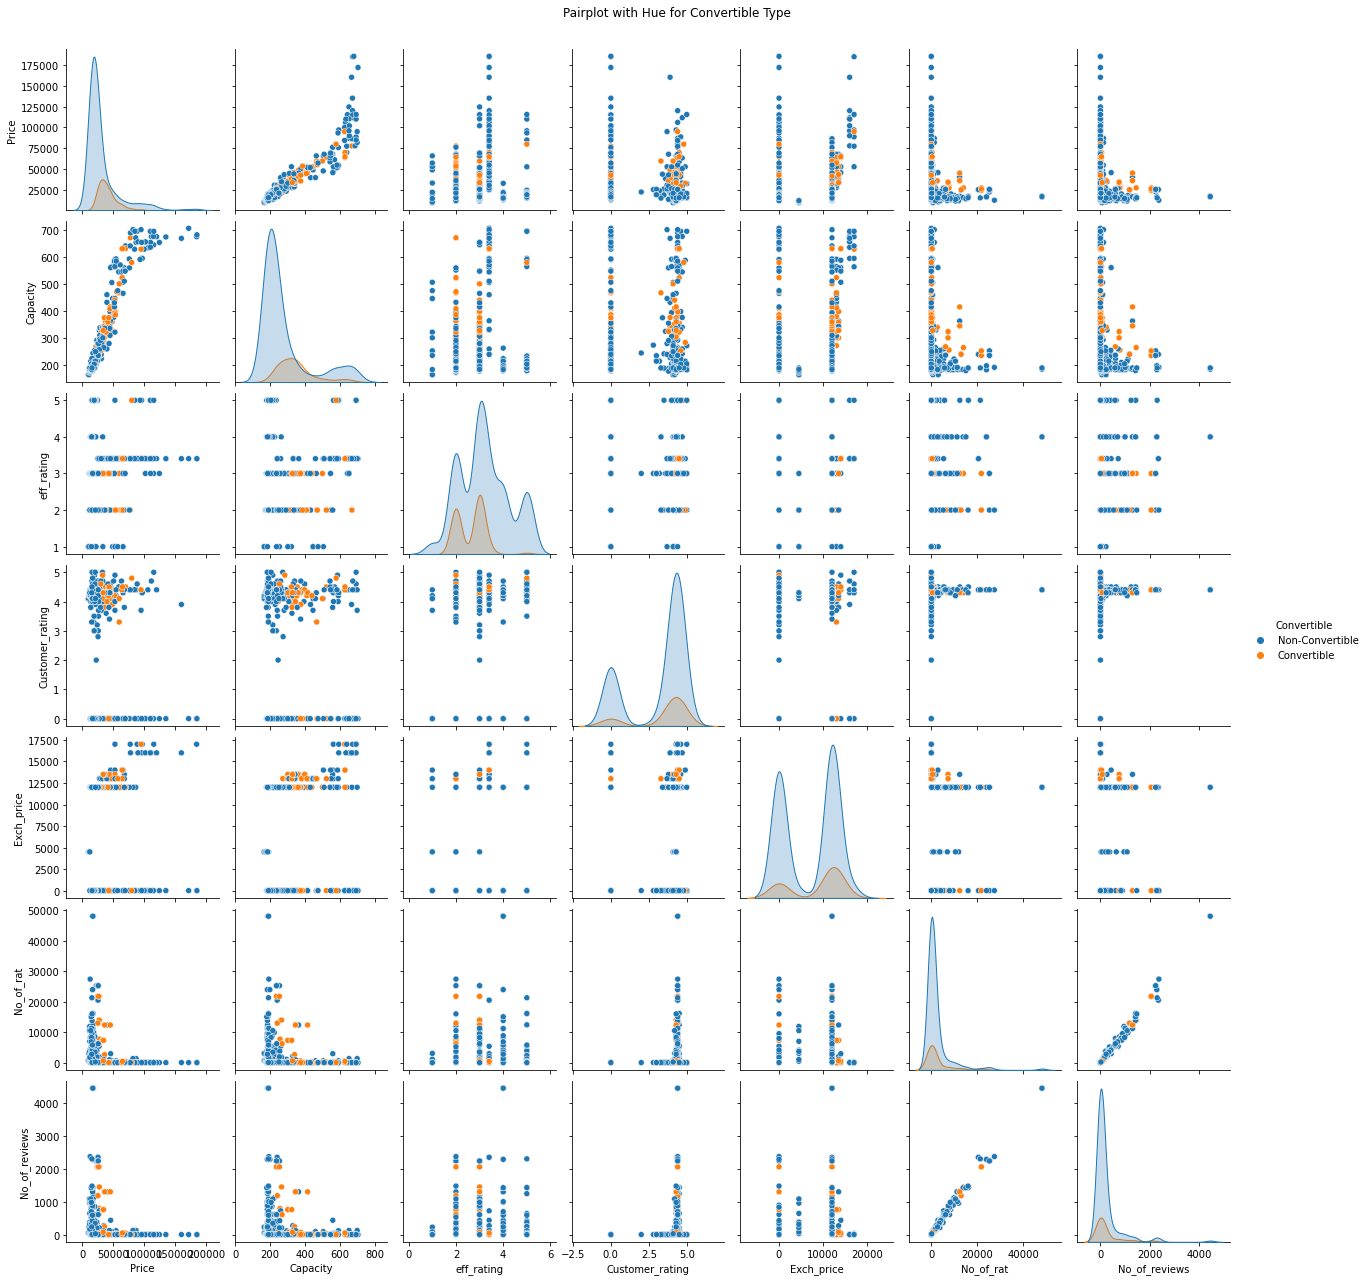

In [252]:
sns.pairplot(DF, hue='Convertible')
plt.suptitle('Pairplot with Hue for Convertible Type', y=1.02)
plt.show()

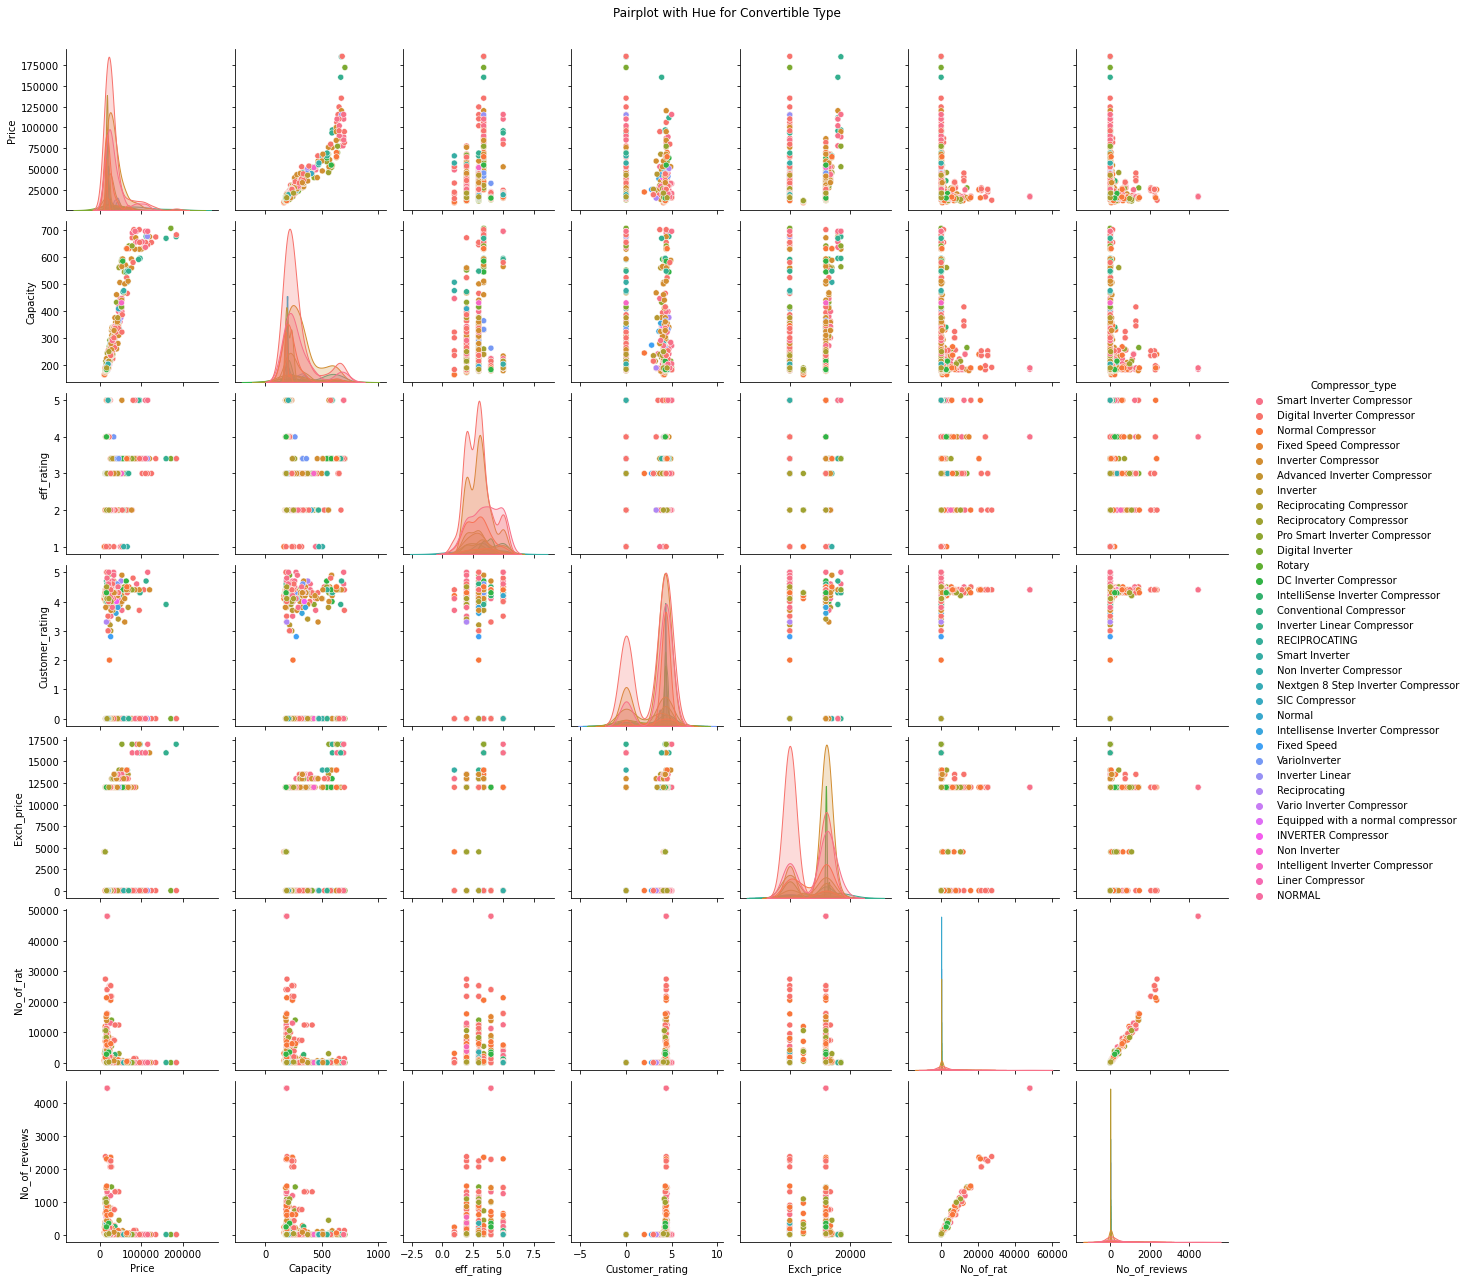

In [30]:
sns.pairplot(DF, hue='Compressor_type')
plt.suptitle('Pairplot with Hue for Convertible Type', y=1.02)
plt.show()